# Closeness centrality

## Langkah 1: Crawl data judul berita dan isi berita dari https://tribunjatim.co/

## Aparat Keamanan

In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def get_article_content(article_url):
    response = requests.get(article_url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        article_content = soup.find('div', class_='single-wrap').find_all('p')
        content = '\n'.join([p.get_text() for p in article_content])
        return content
    return ""

def scrape_news_data(start_date, end_date):
    base_url = "https://tribunjatim.co/indeks/?dy={}&mt={}&yr={}"
    data = []

    current_date = start_date
    while current_date <= end_date:
        url = base_url.format(current_date.day, current_date.month, current_date.year)
        response = requests.get(url)

        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            news_elements = soup.find_all('h2', class_='entry-title')

            for element in news_elements:
                title = element.a.text
                article_url = element.a['href']
                content = get_article_content(article_url)

                data.append({'Date': current_date.strftime('%d-%m-%Y'), 'Title': title, 'Content': content})

            current_date += timedelta(days=1)
        else:
            print(f"Failed to fetch data for {current_date.strftime('%d-%m-%Y')}")

    return data

from datetime import date, timedelta
start_date = date(2023, 10, 1)
end_date = date(2023, 10, 2)

news_data = scrape_news_data(start_date, end_date)


In [32]:
# Create a pandas DataFrame from the scraped data
df = pd.DataFrame(news_data)


In [11]:
df['Title'] = df['Title'].str.replace('\n', '')

In [12]:
df['Label'] = 'Aparat Keamanan'


In [13]:
df

,Date,Title,Content,Label
0,01-10-2023,Ide Kreatif Babinsa Koramil Ngetos Ikut Serta ...,Nganjuk – Tribunajatim.co – Babinsa Koramil 1...,Aparat Keamanan
1,01-10-2023,"TNI Gadungan Perdaya Kekasih di Nganjuk, Korba...",Nganjuk – Tribunjatim.co – Aparat Kepolisian S...,Aparat Keamanan
2,01-10-2023,BMKG Klarifikasi Kabar Suhu Panas Tembus 42 De...,Surabaya – tribunjatim.co – Badan Meteorologi...,Aparat Keamanan
3,01-10-2023,"Peduli Remaja,Bati Komsos Koramil 0804/01 Mage...",Magetan-Bati Komsos Koramil 0804/01 Magetan P...,Aparat Keamanan
4,01-10-2023,Babinsa Koramil Tipe B 0804/01 Magetan Hadiri ...,Magetan. tribunjatim.co-Babinsa Koramil 0804/0...,Aparat Keamanan
5,01-10-2023,Dandim 0802/Ponorogo Jadi Irup Pada Upacara Ha...,"\nPonorogo,-Komandan Kodim 0802/Ponorogo, Letk...",Aparat Keamanan
6,01-10-2023,Komandan Kodim 0804/Magetan Letkol Inf Dani In...,Peringatan Hari Kesaktian Pancasila tanggal 1 ...,Aparat Keamanan
7,01-10-2023,"Gotong royong Bersama Warga, Babinsa Koramil D...","\nMadiun – Babinsa Koramil 14/Dagangan, Kodim...",Aparat Keamanan
8,01-10-2023,"Peringati Hari Kesaktian Pancasila, Ini Pesan ...",\nMadiun – Hari Kesaktian Pancasila diperinga...,Aparat Keamanan
9,01-10-2023,Open Turnamen Badminton Danrem Cup 2023 Resmi ...,Jakarta- Tribunjatim.co – Komandan Korem 143/H...,Aparat Keamanan


In [14]:
# Save the DataFrame to a CSV file
df.to_csv('tribun.csv', index=False)

## Langkah 2: Meringkas Fitur Content(Spacy)

In [15]:
import pandas as pd

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
data = pd.read_csv("/content/drive/MyDrive/ppw/tugas/data-tugas/tribun.csv")
data

,Date,Title,Content,Label
0,01-10-2023,Ide Kreatif Babinsa Koramil Ngetos Ikut Serta ...,Nganjuk – Tribunajatim.co – Babinsa Koramil 1...,Aparat Keamanan
1,01-10-2023,"TNI Gadungan Perdaya Kekasih di Nganjuk, Korba...",Nganjuk – Tribunjatim.co – Aparat Kepolisian S...,Aparat Keamanan
2,01-10-2023,BMKG Klarifikasi Kabar Suhu Panas Tembus 42 De...,Surabaya – tribunjatim.co – Badan Meteorologi...,Aparat Keamanan
3,01-10-2023,"Peduli Remaja,Bati Komsos Koramil 0804/01 Mage...",Magetan-Bati Komsos Koramil 0804/01 Magetan P...,Aparat Keamanan
4,01-10-2023,Babinsa Koramil Tipe B 0804/01 Magetan Hadiri ...,Magetan. tribunjatim.co-Babinsa Koramil 0804/0...,Aparat Keamanan
5,01-10-2023,Dandim 0802/Ponorogo Jadi Irup Pada Upacara Ha...,"\nPonorogo,-Komandan Kodim 0802/Ponorogo, Letk...",Aparat Keamanan
6,01-10-2023,Komandan Kodim 0804/Magetan Letkol Inf Dani In...,Peringatan Hari Kesaktian Pancasila tanggal 1 ...,Aparat Keamanan
7,01-10-2023,"Gotong royong Bersama Warga, Babinsa Koramil D...","\nMadiun – Babinsa Koramil 14/Dagangan, Kodim...",Aparat Keamanan
8,01-10-2023,"Peringati Hari Kesaktian Pancasila, Ini Pesan ...",\nMadiun – Hari Kesaktian Pancasila diperinga...,Aparat Keamanan
9,01-10-2023,Open Turnamen Badminton Danrem Cup 2023 Resmi ...,Jakarta- Tribunjatim.co – Komandan Korem 143/H...,Aparat Keamanan


In [19]:
#install library
!pip install sastrawi
!pip install swifter
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16505 sha256=a02658ec54d1db4123f7decde230cc15982814958d335fd0aa14584ffe6513b4
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [21]:
# Impor pustaka spaCy
import spacy

# Memuat model bahasa Inggris spaCy
nlp = spacy.load("en_core_web_sm")

# Berikan berita yang ingin diringkas
berita = data['Content'].iloc[1]

# Analisis teks menggunakan spaCy
doc = nlp(berita)

# Meringkas teks dengan mengekstrak kalimat-kalimat utama
kalimat_utama = [kalimat.text for kalimat in doc.sents]
ringkasan = " ".join(kalimat_utama[:5])  # Mengambil dua kalimat pertama sebagai ringkasan

# Cetak ringkasan
print(ringkasan)


Nganjuk – Tribunjatim.co – Aparat Kepolisian Sektor (Polsek) Ngluyu mengamankan pria berinisial RFP (33), warga Kecamatan Sukomoro, Kabupaten Nganjuk, Jawa Timur, Jumat (28/7/2023) petang.
 
 RFP diamankan polisi karena mengaku sebagai anggota Tentara Nasional Indonesia (TNI) berpangkat Prajurit Kepala (Praka). Padahal ia adalah warga sipil biasa alias TNI gadungan.
 Kepala Seksi Hubungan Masyarakat Kepolisian Resor (Kasi Humas Polres)


## Langkah 3: TF IDF

In [24]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [25]:
kalimat = nltk.sent_tokenize(ringkasan)

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(kalimat)

terms = tfidf_vectorizer.get_feature_names_out()

for i, sentence in enumerate(kalimat):
    print(f"\nKalimat {i+1}: {sentence}")
    for j, term in enumerate(terms):
        tfidf_value = tfidf_matrix[i, j]
        if tfidf_value > 0:
            print(f"{term}: {tfidf_value:.4f}")


Kalimat 1: Nganjuk – Tribunjatim.co – Aparat Kepolisian Sektor (Polsek) Ngluyu mengamankan pria berinisial RFP (33), warga Kecamatan Sukomoro, Kabupaten Nganjuk, Jawa Timur, Jumat (28/7/2023) petang.
2023: 0.2005
28: 0.2005
33: 0.2005
aparat: 0.2005
berinisial: 0.2005
co: 0.2005
jawa: 0.2005
jumat: 0.2005
kabupaten: 0.2005
kecamatan: 0.2005
kepolisian: 0.1581
mengamankan: 0.2005
nganjuk: 0.4011
ngluyu: 0.2005
petang: 0.2005
polsek: 0.2005
pria: 0.2005
rfp: 0.1581
sektor: 0.2005
sukomoro: 0.2005
timur: 0.2005
tribunjatim: 0.2005
warga: 0.1581

Kalimat 2: RFP diamankan polisi karena mengaku sebagai anggota Tentara Nasional Indonesia (TNI) berpangkat Prajurit Kepala (Praka).
anggota: 0.2686
berpangkat: 0.2686
diamankan: 0.2686
indonesia: 0.2686
karena: 0.2686
kepala: 0.2117
mengaku: 0.2686
nasional: 0.2686
polisi: 0.2686
prajurit: 0.2686
praka: 0.2686
rfp: 0.2117
sebagai: 0.2686
tentara: 0.2686
tni: 0.2117

Kalimat 3: Padahal ia adalah warga sipil biasa alias TNI gadungan.
adalah: 0.3483

## Langkah 4: Cosine Similarity

In [26]:
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt

In [27]:
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

for i in range(len(kalimat)):
    for j in range(i+1, len(kalimat)):
        similarity = cosine_similarities[i][j]
        print(f"Similarity Kalimat {i+1} dan Kalimat {j+1}: {similarity:.4f}")

Similarity Kalimat 1 dan Kalimat 2: 0.0335
Similarity Kalimat 1 dan Kalimat 3: 0.0434
Similarity Kalimat 1 dan Kalimat 4: 0.0434
Similarity Kalimat 2 dan Kalimat 3: 0.0581
Similarity Kalimat 2 dan Kalimat 4: 0.0581
Similarity Kalimat 3 dan Kalimat 4: 0.0000


In [28]:
similarity_df = pd.DataFrame(cosine_similarities, columns=range(len(kalimat)), index=range(len(kalimat)))
similarity_df

,0,1,2,3
0,1.000000,0.033478,0.043418,0.043418
1,0.033478,1.000000,0.058144,0.058144
2,0.043418,0.058144,1.000000,0.000000
3,0.043418,0.058144,0.000000,1.000000


## Langkah 5: Graph

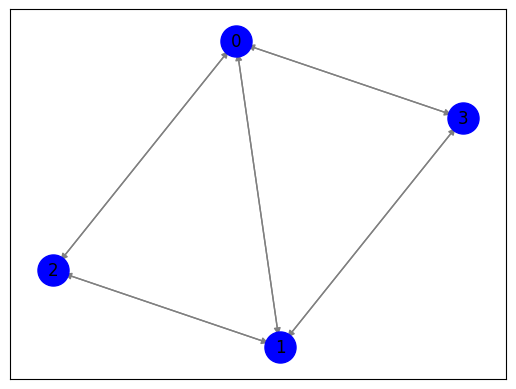

In [29]:
G = nx.DiGraph()
for i in range(len(cosine_similarities)):
    G.add_node(i)

for i in range(len(cosine_similarities)):
    for j in range(len(cosine_similarities)):
        similarity = cosine_similarities[i][j]
        if similarity > 0.02 and i != j:
            G.add_edge(i, j)

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='b')
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

## Langkah 6: Closeness Centrality

In [30]:
closeness_centrality = nx.closeness_centrality(G)

sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
print("\nSorted Closeness Centrality:")
for node, closeness in sorted_closeness:
    print(f"Node {node}: {closeness:.4f}")


Sorted Closeness Centrality:
Node 0: 1.0000
Node 1: 1.0000
Node 2: 0.7500
Node 3: 0.7500


In [31]:
print("\nNode Tertinggi dengan Kalimat:")
for node, closeness in sorted_closeness[:3]:
    top_sentence = kalimat[node]
    print(f"Node {node}: Closeness Centrality = {closeness:.4f}")
    print(f"Kalimat: {top_sentence}\n")


Node Tertinggi dengan Kalimat:
Node 0: Closeness Centrality = 1.0000
Kalimat: Nganjuk – Tribunjatim.co – Aparat Kepolisian Sektor (Polsek) Ngluyu mengamankan pria berinisial RFP (33), warga Kecamatan Sukomoro, Kabupaten Nganjuk, Jawa Timur, Jumat (28/7/2023) petang.

Node 1: Closeness Centrality = 1.0000
Kalimat: RFP diamankan polisi karena mengaku sebagai anggota Tentara Nasional Indonesia (TNI) berpangkat Prajurit Kepala (Praka).

Node 2: Closeness Centrality = 0.7500
Kalimat: Padahal ia adalah warga sipil biasa alias TNI gadungan.

